In [1]:
import pandas as pd


In [2]:
df = pd.read_excel('data/GDL RegionConnect dataset .xlsx')
print(df.shape)
countries = df['Country'].unique()
df[df['Country']==countries[1]]

(1953, 7)


,Country,ISO_Code,Level,GDLCODE,Region,Sub-national HDI,Mean years schooling
9,Albania,ALB,National,ALBt,Total,0.794,10.100
10,Albania,ALB,Subnat,ALBr201,Berat,0.782,9.494
11,Albania,ALB,Subnat,ALBr202,Diber,0.754,8.683
12,Albania,ALB,Subnat,ALBr203,Durres,0.802,10.060
13,Albania,ALB,Subnat,ALBr204,Elbasan,0.784,8.905
14,Albania,ALB,Subnat,ALBr205,Fier,0.767,9.592
15,Albania,ALB,Subnat,ALBr206,Gjirokaster,0.794,10.240
16,Albania,ALB,Subnat,ALBr207,Korce,0.790,9.628
17,Albania,ALB,Subnat,ALBr208,Kukes,0.749,9.690
18,Albania,ALB,Subnat,ALBr209,Lezhe,0.769,9.316


In [3]:
import geopandas
import cartopy.io.shapereader as shpreader

shpfilename = shpreader.natural_earth(
    resolution='10m',
    category='cultural',
    name='admin_1_states_provinces'
)
adm1shps = geopandas.read_file(shpfilename,encoding='utf-8')
adm1shps['name_unaccent'] = adm1shps['name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
adm1shps['name_unaccent'] = adm1shps['name_unaccent'].str.replace('[\'`]','')
print(adm1shps.columns)
adm1shps.head()


Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt', 'name_local',
       'type', 'type_en', 'code_local', 'code_hasc', 'note', 'hasc_maybe',
       'region', 'region_cod', 'provnum_ne', 'gadm_level', 'check_me',
       'datarank', 'abbrev', 'postal', 'area_sqkm', 'sameascity', 'labelrank',
       'name_len', 'mapcolor9', 'mapcolor13', 'fips', 'fips_alt', 'woe_id',
       'woe_label', 'woe_name', 'latitude', 'longitude', 'sov_a3', 'adm0_a3',
       'adm0_label', 'admin', 'geonunit', 'gu_a3', 'gn_id', 'gn_name',
       'gns_id', 'gns_name', 'gn_level', 'gn_region', 'gn_a1_code',
       'region_sub', 'sub_code', 'gns_level', 'gns_lang', 'gns_adm1',
       'gns_region', 'min_label', 'max_label', 'min_zoom', 'wikidataid',
       'name_ar', 'name_bn', 'name_de', 'name_en', 'name_es', 'name_fr',
       'name_el', 'name_hi', 'name_hu', 'name_id', 'name_it', 'name_ja',
       'name_ko', 'name_nl', 'name_pl', 'name_

/tmp/ipykernel_28404/2837684008.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  adm1shps['name_unaccent'] = adm1shps['name_unaccent'].str.replace('[\'`]','')


,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,ne_id,geometry,name_unaccent
0,Admin-1 scale rank,3,ARG-1309,1309,AR-E,None,AR,1,Entre Ríos,Entre-Rios,...,Entre Ríos,Entre Ríos,Энтре-Риос,Entre Ríos,Entre Ríos eyaleti,Entre Ríos,恩特雷里奥斯省,1159309789,"POLYGON ((-58.20011 -32.44713, -58.20012 -32.4...",Entre Rios
1,Admin-1 scale rank,6,URY-8,8,UY-PA,None,UY,1,Paysandú,None,...,Paysandú,Paysandú,Пайсанду,Paysandú,Paysandu Departmanı,Paysandú,派桑杜省,1159307733,"POLYGON ((-58.20012 -32.44720, -58.20011 -32.4...",Paysandu
2,Admin-1 scale rank,3,PAK-1114,1114,PK-SD,None,PK,1,Sind,Sindh,...,Sindh,Sind,Синд,Sindh,Sind Eyaleti,Sindh,信德省,1159309351,"MULTIPOLYGON (((68.18304 23.84216, 68.18301 23...",Sind
3,Admin-1 scale rank,2,IND-3264,3264,IN-GJ,None,IN,1,Gujarat,None,...,Gudźarat,Gujarate,Гуджарат,Gujarat,Gucerat,Gujarat,古吉拉特邦,1159314179,"POLYGON ((68.18301 23.84209, 68.18304 23.84216...",Gujarat
4,Admin-1 scale rank,2,IDN-1185,1185,ID-KI,None,ID,5,Kalimantan Timur,Kaltim,...,Borneo Wschodnie,Kalimantan Oriental,Восточный Калимантан,Kalimantan Timur,Doğu Kalimantan,Đông Kalimantan,東加里曼丹省,1159310009,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Kalimantan Timur


In [4]:
df

,Country,ISO_Code,Level,GDLCODE,Region,Sub-national HDI,Mean years schooling
0,Afghanistan,AFG,National,AFGt,Total,0.511,3.900
1,Afghanistan,AFG,Subnat,AFGr101,Central (Kabul Wardak Kapisa Logar Parwan Panj...,0.591,6.500
2,Afghanistan,AFG,Subnat,AFGr102,Central Highlands (Bamyan Daikundi),0.501,2.426
3,Afghanistan,AFG,Subnat,AFGr103,East (Nangarhar Kunar Laghman Nooristan),0.493,4.344
4,Afghanistan,AFG,Subnat,AFGr104,North (Samangan Sar-e-Pul Balkh Jawzjan Faryab),0.530,3.995
...,...,...,...,...,...,...,...
1948,Zimbabwe,ZWE,Subnat,ZWEr104,Mashonaland West,0.539,8.130
1949,Zimbabwe,ZWE,Subnat,ZWEr108,Masvingo,0.566,7.819
1950,Zimbabwe,ZWE,Subnat,ZWEr105,Matebeleland North,0.520,6.720
1951,Zimbabwe,ZWE,Subnat,ZWEr106,Matebeleland South,0.563,7.644


In [5]:
print(df[df['Region']!="Total"].shape)
merged = adm1shps.merge(df, right_on="Region",left_on="name_unaccent")
print(merged.shape)
merged.to_file("data/adm1.shp")
merged.head()

(1768, 7)
(1111, 92)


/tmp/ipykernel_28404/3014373103.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged.to_file("data/adm1.shp")


,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,ne_id,geometry,name_unaccent,Country,ISO_Code,Level,GDLCODE,Region,Sub-national HDI,Mean years schooling
0,Admin-1 scale rank,2,IND-3264,3264,IN-GJ,None,IN,1,Gujarat,None,...,1159314179,"POLYGON ((68.18301 23.84209, 68.18304 23.84216...",Gujarat,India,IND,Subnat,INDr105,Gujarat,0.672,6.976
1,Admin-1 scale rank,6,MYS-1186,1186,MY-12,None,MY,5,Sabah,North Borneo,...,1159310033,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Sabah,Malaysia,MYS,Subnat,MYSr112,Sabah,0.710,8.158
2,Admin-1 scale rank,4,BOL-1936,1936,BO-L,None,BO,1,La Paz,None,...,1159311175,"POLYGON ((-69.29003 -17.97663, -69.30241 -17.9...",La Paz,Bolivia,BOL,Subnat,BOLr102,La Paz,0.719,9.468
3,Admin-1 scale rank,4,BOL-1936,1936,BO-L,None,BO,1,La Paz,None,...,1159311175,"POLYGON ((-69.29003 -17.97663, -69.30241 -17.9...",La Paz,Honduras,HND,Subnat,HNDr112,La Paz,0.582,5.339
4,Admin-1 scale rank,7,HND-649,649,HN-LP,None,HN,1,La Paz,None,...,1159309113,"POLYGON ((-88.17753 13.98519, -88.19348 13.985...",La Paz,Bolivia,BOL,Subnat,BOLr102,La Paz,0.719,9.468


In [6]:
from cartopy import crs as ccrs
import cartopy

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
norm  = mpl.colors.Normalize(vmin=0, vmax=8)
cmap = mpl.cm.get_cmap('viridis_r')
cmap(0.6)

(0.163625, 0.471133, 0.558148, 1.0)

/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:385

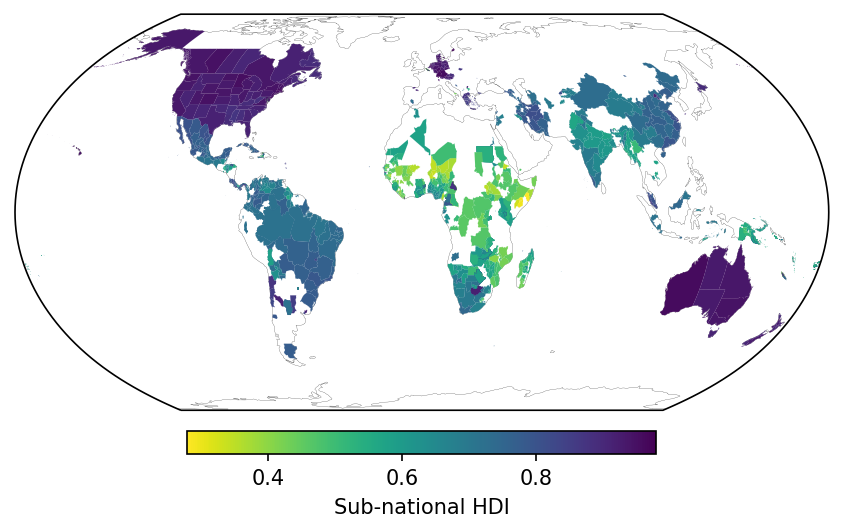

In [8]:
import geoplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=150, figsize=(7,4.5))
ax = plt.subplot(projection=ccrs.EqualEarth())

ax.coastlines(lw=0.1)

import matplotlib as mpl

cmap = mpl.cm.get_cmap('viridis_r')
norm = mpl.colors.Normalize(vmin=merged['Sub-national HDI'].min(), vmax=merged['Sub-national HDI'].max())
colors = list(map(lambda x: cmap(norm(x)),merged['Sub-national HDI']))

#ax.add_geometries(merged.geometry, lw=0.1, linestyle=':',crs=ccrs.EqualEarth(),color=colors)
for i, row in merged.iterrows():
    ax.add_geometries(
        [row['geometry']],color=cmap(norm(row['Sub-national HDI'])), 
        crs=ccrs.PlateCarree(),lw=0.1, linestyle=':',ec="black"
    )
    

    
    
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
    ax=ax, orientation="horizontal",
    fraction=0.046, pad=0.04
)
cbar.set_label('Sub-national HDI')

In [9]:
grid_df = pd.read_csv('../regional-impacts-map/data/2_merged_da_data.csv')
grid_df.head()

,LAT,LON,LAT_25,LON_25,LAT_5,LON_5,knutson_precip,updated_precip,knutson_temp,updated_temp,...,precip_da_cat,temp_da_cat,temp_da_binary,precip_da_binary,n_da_impacts,max_da_cat,study_addition,total_study_prop,area,is_land
0,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False
1,-88.75,-176.25,-88.75,-176.25,-87.5,-177.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False
2,-88.75,-173.75,-88.75,-173.75,-87.5,-172.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False
3,-88.75,-171.25,-88.75,-171.25,-87.5,-172.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False
4,-88.75,-168.75,-88.75,-168.75,-87.5,-167.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False


Text(0.5, 1.0, '2.5 degree grid cells')

/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


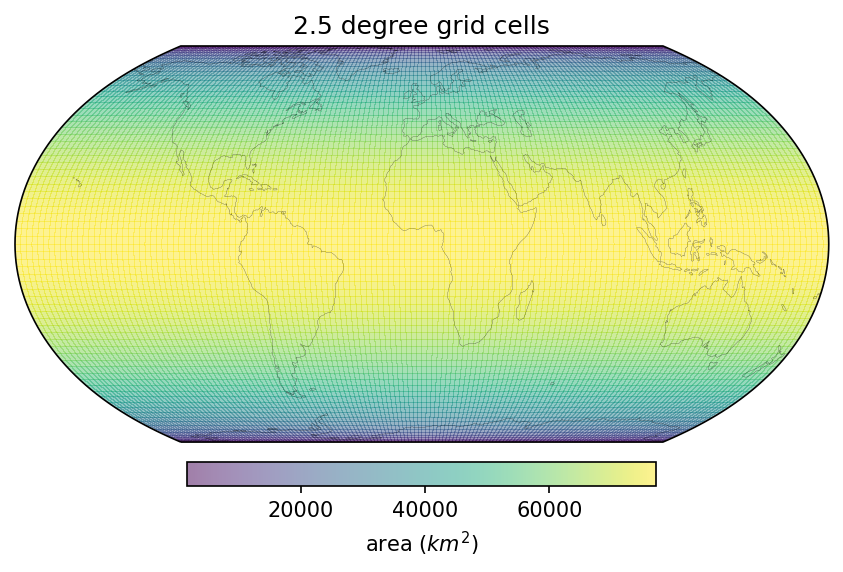

In [10]:
import numpy as np

fig = plt.figure(dpi=150, figsize=(7,4.5))

ax = plt.subplot(projection=ccrs.EqualEarth())

ax.coastlines(lw=0.1)

n = np.array(grid_df.area).reshape(len(grid_df.LAT.unique()),len(grid_df.LON.unique()))

mesh = ax.pcolormesh(
    grid_df.LON.unique(),
    grid_df.LAT.unique(),
    n,
    alpha=0.5,
    transform=ccrs.PlateCarree(),
)

cbar = plt.colorbar(mesh, orientation="horizontal",
                   fraction=0.046, pad=0.04)
cbar.set_label('area ($km^2$)')

ax.set_title('2.5 degree grid cells')

Text(0.5, 1.0, '0.5 degree grid cells')

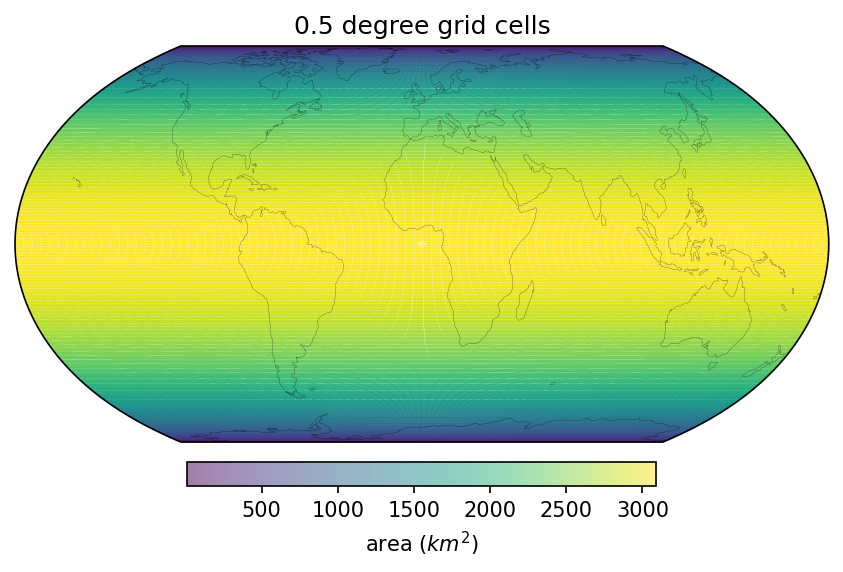

In [13]:
import numpy as np

subgrid_df = pd.read_csv('data/subgrid.csv')
subgrid_df.head()

fig = plt.figure(dpi=150, figsize=(7,4.5))

ax = plt.subplot(projection=ccrs.EqualEarth())

ax.coastlines(lw=0.1)

import math
def area_cell(lat, lon, degrees): 
    # calculate the area of a gridcell given the center lat and lon and the size in degrees
    if lon <0:
        lon+=360
    R = 6371
    f0 = math.radians(lat-degrees*0.5)
    f1 = math.radians(lat+degrees*0.5)
    l0 = math.radians(lon-degrees*0.5)
    l1 = math.radians(lon+degrees*0.5)

    return (math.sin(f1)-math.sin(f0)) * (l1 - l0) * R**2


subgrid_df['area'] = subgrid_df.apply(lambda x: area_cell(x['lat_05'], x['lon_05'], 0.5), axis=1)

n = np.array(subgrid_df.area).reshape(len(subgrid_df.lat_05.unique()),len(subgrid_df.lon_05.unique()))

mesh = ax.pcolormesh(
    subgrid_df.lon_05.unique(),
    subgrid_df.lat_05.unique(),
    n,
    alpha=0.5,
    transform=ccrs.PlateCarree(),
)

cbar = plt.colorbar(mesh, orientation="horizontal",fraction=0.046, pad=0.04)
cbar.set_label('area ($km^2$)')

ax.set_title('0.5 degree grid cells')

In [14]:
for i, row in merged[merged['name_unaccent']=="South Australia"].iterrows():
    pass


/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


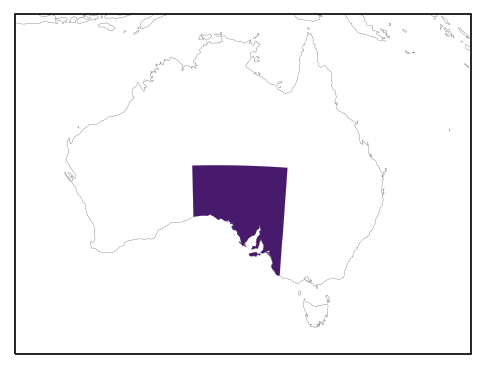

In [15]:
fig, ax = plt.subplots(dpi=150, figsize=(7,3))
albo = ccrs.AlbersEqualArea(
    central_latitude=0,
    false_easting=0, 
    false_northing=0, 
    central_longitude=132, 
    standard_parallels=(-18, -36)
)
ax = plt.subplot(projection=albo)
ax.coastlines(lw=0.1)
ax.add_geometries([row['geometry']],color=cmap(norm(row['Sub-national HDI'])), crs=ccrs.PlateCarree(),lw=0.1, linestyle=':')
ax.set_extent([110,160,-45,-8])


In [11]:
grid_df = pd.read_csv('../regional-impacts-map/data/2_merged_da_data.csv')
grid_df.head()

,LAT,LON,LAT_25,LON_25,LAT_5,LON_5,knutson_precip,updated_precip,knutson_temp,updated_temp,...,precip_da_cat,temp_da_cat,temp_da_binary,precip_da_binary,n_da_impacts,max_da_cat,study_addition,total_study_prop,area,is_land
0,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False
1,-88.75,-176.25,-88.75,-176.25,-87.5,-177.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False
2,-88.75,-173.75,-88.75,-173.75,-87.5,-172.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False
3,-88.75,-171.25,-88.75,-171.25,-87.5,-172.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False
4,-88.75,-168.75,-88.75,-168.75,-87.5,-167.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False


In [12]:
subgrid_df = pd.read_csv('data/subgrid.csv')
subgrid_df.head()

,lat_05,lon_05,LAT,LON,LAT_25,LON_25,LAT_5,LON_5,knutson_precip,updated_precip,...,temp_da_binary,precip_da_binary,n_da_impacts,max_da_cat,study_addition,total_study_prop,area,is_land,Gujarat,South Australia
0,-89.75,-179.75,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,...,0,0,0,0.0,add,0.0,1685.654015,False,0,0
1,-89.75,-179.25,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,...,0,0,0,0.0,add,0.0,1685.654015,False,0,0
2,-89.75,-178.75,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,...,0,0,0,0.0,add,0.0,1685.654015,False,0,0
3,-89.75,-178.25,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,...,0,0,0,0.0,add,0.0,1685.654015,False,0,0
4,-89.75,-177.75,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,...,0,0,0,0.0,add,0.0,1685.654015,False,0,0


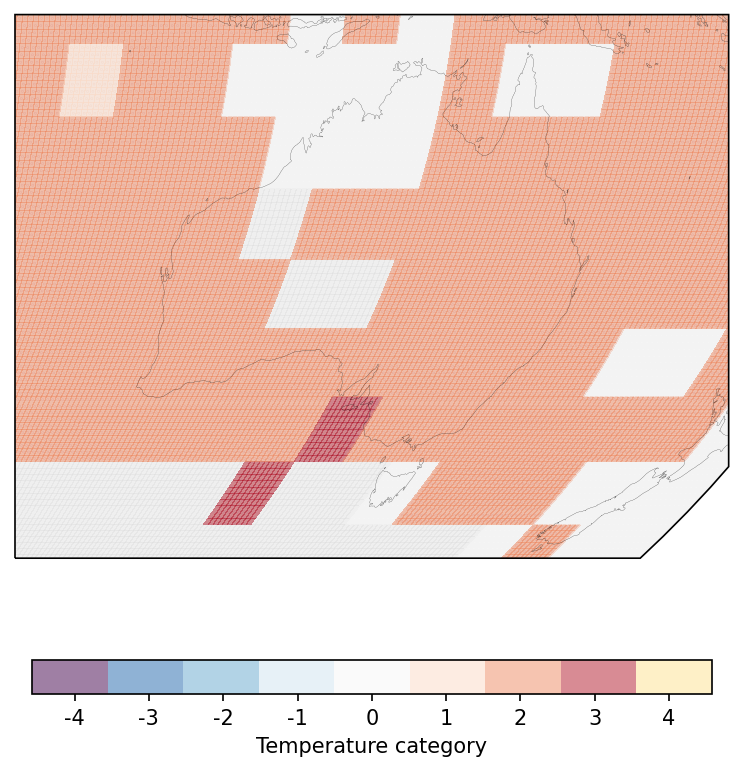

In [16]:
import numpy as np

fig = plt.figure(dpi=150, figsize=(7,6))

ax = plt.subplot(projection=ccrs.EqualEarth())

ax.coastlines(lw=0.1)

ax.set_extent([110,160,-45,-8])

bn = np.zeros((len(subgrid_df.lat_05.unique()),len(subgrid_df.lon_05.unique())))
bn+=1
mesh = ax.pcolormesh(
    subgrid_df.lon_05.unique(),
    subgrid_df.lat_05.unique(),
    bn,
    cmap = mpl.colors.ListedColormap(["#e0e0e0"]),
    transform=ccrs.PlateCarree(),
    alpha=0.5
)


subgrid_df['y'] = subgrid_df.updated_temp
n = np.array(subgrid_df.y).reshape(len(subgrid_df.lat_05.unique()),len(subgrid_df.lon_05.unique()))
#n = np.array(subgrid_df.is_land).reshape(len(subgrid_df.lon_05.unique()),len(subgrid_df.lat_05.unique()))

colors = ['#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
colors.reverse()
mesh = ax.pcolormesh(
    subgrid_df.lon_05.unique(),
    subgrid_df.lat_05.unique(),
    n,
    cmap=mpl.colors.ListedColormap(colors),
    vmin=-4, vmax=4,
    transform=ccrs.PlateCarree(),
    alpha=0.5
    #shading="gouraud"
)
ax.scatter(
    subgrid_df['lon_05'],
    subgrid_df['lat_05'],
    transform=ccrs.PlateCarree(),
    s=0.001,alpha=0.8,
    cmap=mpl.colors.ListedColormap(colors),
    c=subgrid_df['updated_temp'],
)

cbar = plt.colorbar(
    mesh, orientation="horizontal", fraction=0.05,
    ticks=np.linspace(-3.5,3.5,9),
)
cbar.ax.set_xticklabels(np.arange(-4,5))
cbar.set_label('Temperature category')

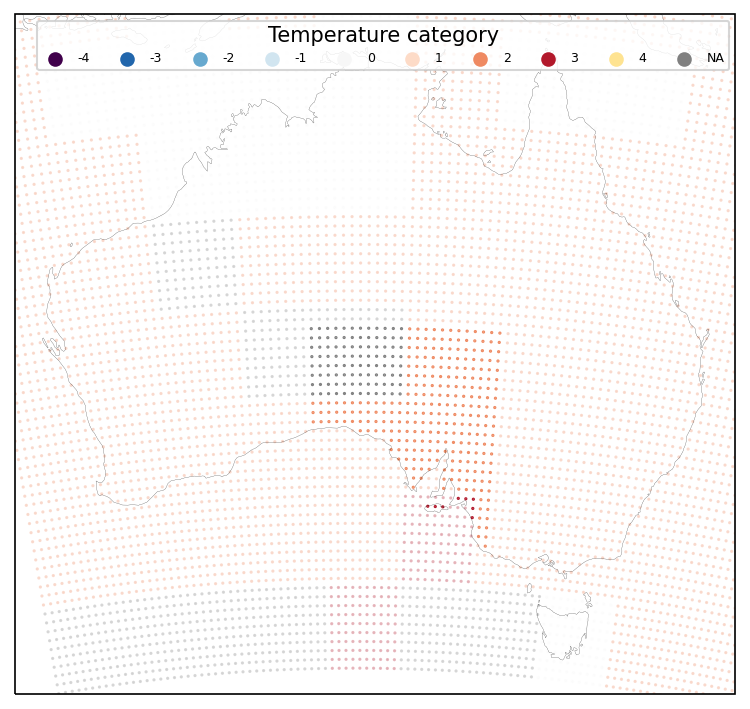

In [89]:
import numpy as np

fig = plt.figure(dpi=150, figsize=(7,6))

ax = plt.subplot(projection=albo)
ax.coastlines(lw=0.1)
ax.set_extent([114,152,-45,-8])

colors = ['grey','#fee391','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]
colors.reverse()

ausgrid = subgrid_df[
    (subgrid_df['LAT']>-45) & (subgrid_df['LAT']<-8) &
    (subgrid_df['LON']>110) & (subgrid_df['LON']<160)
]

ax.add_geometries(
    [row['geometry']],color=cmap(norm(row['Sub-national HDI'])), 
    crs=ccrs.PlateCarree(),lw=0.8, linestyle=':', alpha=0.4,ec="black"
)

alpha = np.where(ausgrid['South Australia']==1, 1,0.3)

cmap=mpl.colors.ListedColormap(colors)
norm = mpl.colors.Normalize(vmin=-4,vmax=5)

scatter = ax.scatter(
    ausgrid['lon_05'],ausgrid['lat_05'],
    transform=ccrs.PlateCarree(),s=0.3,alpha=alpha,
    cmap=cmap,
    c=ausgrid['updated_temp'].fillna(5),
    norm = norm
)

for x in range(-4,6):
    ax.scatter(
        [],[],label=str(x).replace("5","NA"),
        color=cmap(norm(x))
    )

ax.legend(
    title="Temperature category",ncol=10, fontsize=6,
    
)

983016.6611242541


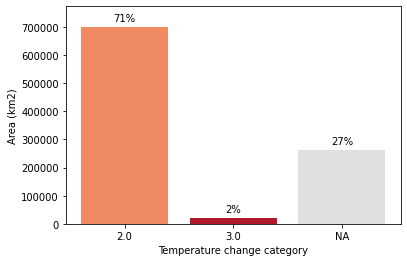

In [96]:
fig, ax = plt.subplots()

aus_grid = subgrid_df[subgrid_df['South Australia']==1].fillna("NA")
aus_grid = aus_grid.groupby('updated_temp',dropna=False)['area'].sum().to_frame().reset_index()

area_sum = aus_grid['area'].sum()
cdict = {2: '#ef8a62',3: '#b2182b',"NA": '#e0e0e0'}
for i, row in aus_grid.iterrows():
    ax.bar(i,row['area'],color=cdict[row['updated_temp']])
    ax.text(i, row['area']+area_sum*.02, f"{row['area']/aus_grid['area'].sum():.0%}",ha="center")
    
ax.set_ylim(ymax=ax.get_ylim()[1]*1.05)

ax.set_xticks(aus_grid.index)
ax.set_xticklabels(aus_grid['updated_temp'])

ax.set_ylabel('Area (km2)')
ax.set_xlabel('Temperature change category')

print(area_sum)

In [113]:
merged.crs = "EPSG:4326"
merged[merged['Region']=="South Australia"]['geometry'].to_crs({'proj':'cea'}).area / 10**6

723    983875.081246
dtype: float64

In [116]:
f"{(983016.6611242541-983875.081246) / 983875.081246:.5%}"

'-0.08725%'